In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [112]:
df = pd.read_csv('Data/LordsMobileVN_clean.csv')

# Phân tích bài viết

In [113]:
df_post = df
df_post['reactions'] = df_post['reactions'].apply(lambda x : dict(eval(x)) )
df_post_1 = df_post['reactions'].apply(pd.Series )
# Merge cột vào dataframe
df_post_2 = pd.concat([df_post, df_post_1], axis=1).drop('reactions', axis=1)
df_post_2= df_post_2.fillna(0)
df_post_2[['post_text','like','love','haha','wow','sad','angry','care',
                                 'shares','comments','reaction_count']]


C:\Users\nhuyh\AppData\Local\Temp\ipykernel_24104\2000623767.py:3: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  df_post_1 = df_post['reactions'].apply(pd.Series )


,post_text,like,love,haha,wow,sad,angry,care,shares,comments,reaction_count
0,Sự hợp tác hoành tráng giữa Lords Mobile x Arm...,54.0,4.0,1.0,0.0,0.0,0.0,0.0,2,4,59
1,"🥹 Không có so sánh, không có đau thương",97.0,0.0,25.0,0.0,0.0,0.0,0.0,1,17,122
2,"Hồi xưa thấy bình thường ha, giờ thì quý lắm l...",130.0,3.0,30.0,1.0,1.0,0.0,0.0,0,22,165
3,0,91.0,2.0,6.0,0.0,0.0,0.0,0.0,0,17,99
4,🎁 THỬ THÁCH GIẢI ĐỐ 7 NGÀY 6 ĐÊM GÉT GÔ 🎁\r\n▪...,96.0,2.0,0.0,0.0,0.0,0.0,0.0,1,244,98
...,...,...,...,...,...,...,...,...,...,...,...
195,Mời các nông dân vườn khoai trả lời ạ !,183.0,2.0,44.0,2.0,2.0,1.0,0.0,0,79,234
196,"Sau bao nhiêu năm, người đàn ông tôi cần nhất ...",96.0,3.0,27.0,0.0,0.0,0.0,1.0,1,43,127
197,🧑‍⚕️ Nào mình cùng đến thăm bệnh nhân tại Thán...,176.0,3.0,164.0,2.0,3.0,0.0,2.0,1,57,350
198,Chào tháng 8 cùng nhiều sự kiện hấp dẫn diễn r...,132.0,7.0,1.0,0.0,0.0,0.0,0.0,1,27,140


1. Bài viết có lượng tương tác nhiều nhất

In [114]:
max_reactions_post = df[df['reaction_count']== df['reaction_count'].max()]
max_reactions_post[['post_text', 'time', 'reaction_count']]

,post_text,time,reaction_count
23,"Lọt-thủ ơi, thời tới rồi 👍👍👍👍 mạnh nào ~",2023-11-04 09:04:42,845


2. Tìm các bài viết chứa 1 từ khóa nào đó

In [115]:
# Tìm các bài viết chứa 1 từ khóa nào đó

a = df_post_2['post_text'].tolist()
len(a)

res = []

for i in list(a):

    if "Kim Cương" in str(i):
        res.append(i)

print('Có {} bài viết chứa từ khóa "Kim Cương" trong tổng số {} bài viết.'.format(len(res), len(a)))
res


Có 20 bài viết chứa từ khóa "Kim Cương" trong tổng số 200 bài viết.


['💎𝗞𝗛𝗨𝗬𝗘̂́𝗡 𝗠𝗔̃𝗜 𝟮𝟬% 𝗞𝗜𝗠 𝗖𝗨̛𝗢̛𝗡𝗚💎\r\nTừ 10/11/2023 12:00:00 - 11/11/2023 11:59:59 (giờ Việt Nam)\r\nKhuyến mãi tặng thêm 20% khi mua Kim Cương trên Webpay Gamota (https://pay.gamota.com/game/detail/lordsmobile)\r\n⚠️Lưu ý:\r\n- Chỉ áp dụng cho mệnh giá từ 20.000 đến 5 Triệu VNĐ.\r\n- Chỉ áp dụng cho đơn Nạp đầu tiên trong thời gian khuyến mãi, mỗi người chơi chỉ được khuyến mãi duy nhất một lần, đơn nạp tiếp theo sẽ không được khuyến mãi.\r\n- Sự kiện chỉ áp dụng cho các gói nạp có giá trị tối đa 5 triệu VND\r\n- Vui lòng nạp đúng mệnh giá. Nạp sai mệnh giá dẫn đến lỗi nạp sẽ được xử lý sau 3-5 ngày làm việc',
 '💎𝗞𝗛𝗨𝗬𝗘̂́𝗡 𝗠𝗔̃𝗜 𝟮𝟬% 𝗞𝗜𝗠 𝗖𝗨̛𝗢̛𝗡𝗚💎\r\nTừ 4/11/2023 12:00:00 - 5/11/2023 11:59:59 (giờ Việt Nam)\r\nKhuyến mãi tặng thêm 20% khi mua Kim Cương trên Webpay Gamota (https://pay.gamota.com/game/detail/lordsmobile)\r\n⚠️Lưu ý:\r\n- Chỉ áp dụng cho mệnh giá từ 20.000 đến 5 Triệu VNĐ.\r\n- Chỉ áp dụng cho đơn Nạp đầu tiên trong thời gian khuyến mãi, mỗi người chơi chỉ được khuyến mãi duy

3. Tổng số bài đăng theo giờ và tổng reaction của những bài đăng

In [116]:
df['time'] = pd.to_datetime(df['time'])

In [117]:
df['hour'] = df['time'].dt.hour

In [118]:
# Tổng số bài viết theo giờ
df_posts_hour = df['hour'].value_counts()

df_posts_hour = df_posts_hour.reindex(range(24), fill_value=0)

df_posts_hour

hour
0      0
1      0
2      1
3      0
4      0
5      0
6      0
7      1
8     66
9     14
10    25
11     8
12    11
13     9
14    10
15    10
16    24
17     3
18     3
19     7
20     3
21     2
22     3
23     0
Name: count, dtype: int64

In [119]:
# Tổng số reactions theo giờ
df_reactions_by_hour = df.groupby('hour')['reaction_count'].sum()

# Tạo 24 chỉ số, chỉ số mới có giá trị 0
df_reactions_by_hour = df_reactions_by_hour.reindex(range(24), fill_value=0)

df_reactions_by_hour

hour
0         0
1         0
2       124
3         0
4         0
5         0
6         0
7        62
8     14586
9      3593
10     4488
11      814
12     1081
13     1749
14     1372
15     1637
16     4548
17      763
18      358
19     1370
20      328
21      409
22      466
23        0
Name: reaction_count, dtype: int64

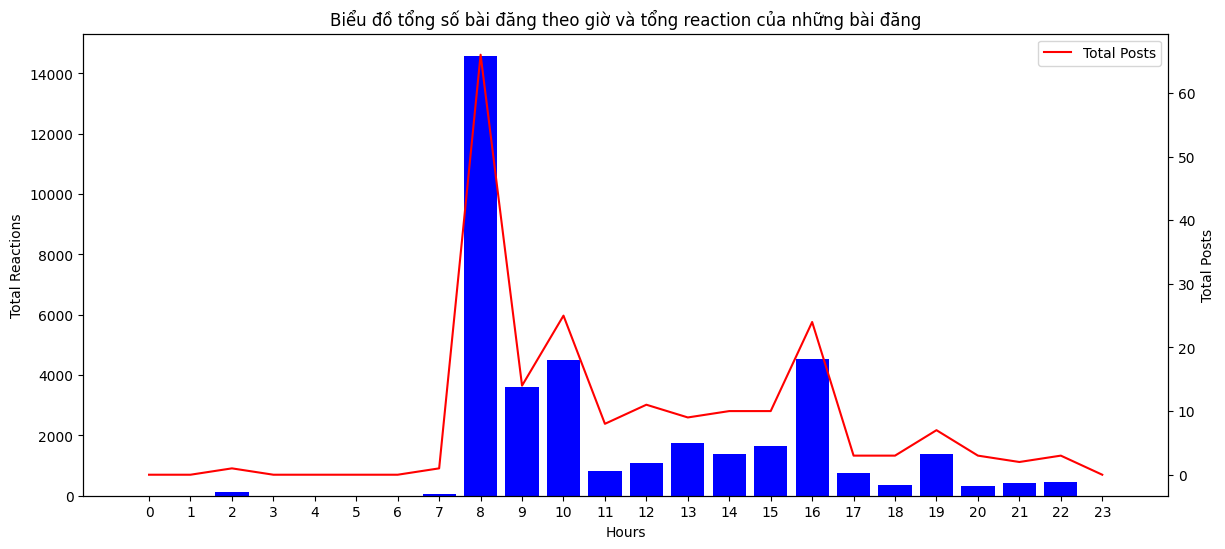

In [120]:
fig, ax1 = plt.subplots(figsize=(14, 6))

ax1.bar(df_reactions_by_hour.index, df_reactions_by_hour.values, color='blue', label='Total Reactions')
ax1.set_xticks(df_reactions_by_hour.index)
ax1.set_xlabel('Hours')
ax1.set_ylabel('Total Reactions')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()

ax2.plot(df_posts_hour.index, df_posts_hour.values, color='red', label='Total Posts')
ax2.set_ylabel('Total Posts')
ax2.tick_params(axis='y')

plt.title('Biểu đồ tổng số bài đăng theo giờ và tổng reaction của những bài đăng')
plt.xlabel('Hours')
plt.legend()
plt.show()

4. Từ khóa được dùng nhiều nhất trong các bài viết

In [121]:
# Lấy tất cả các bài viết
df_post_2['post_text']
# Tạo biến text rỗng
text = ""
# Lặp qua tất cả các bài viết
for i in df_post_2['post_text']:
    # Chuyển đổi kiểu dữ liệu của i thành str
    i_str = str(i)
    # Nối i_str vào text
    text = text + i_str + "\n"
# In kết quả
print(text)

Sự hợp tác hoành tráng giữa Lords Mobile x Armored Combat Worldwide đã kết thúc với cuộc đụng độ gay cấn giữa các Bang hội!
Chúng tôi hy vọng bạn thích chứng kiến ngọn lửa của trận chiến thời trung cổ bùng cháy trong suốt sự kiện này. ⚔️🛡️
#LordsMobile #ACW
🥹 Không có so sánh, không có đau thương
Hồi xưa thấy bình thường ha, giờ thì quý lắm luôn 😲😲😲

It was normal in the past, but now it is very precious 😲😲😲
0
🎁 THỬ THÁCH GIẢI ĐỐ 7 NGÀY 6 ĐÊM GÉT GÔ 🎁
▪️Bước 1: Vào game > trả lời câu hỏi trên ảnh + quýnh giá Ờ-Mây-Zing-Gút Chóp để tham gia sự kiện.
▪️Bước 2: Rung đùi và đợi ngày công bố giải thưởng thôi nè. Quá dễ luôn 😉
💁Lưu ý:
-Giải thưởng cao nhất 10k, thấp nhất 2K Ngọc liên kết.
-Thời gian diễn ra sự kiện: từ 2-4 ngày (Có thể kết thúc sớm nếu đã đủ số lượng người tham gia)
-Các Chúa Tể có thể tham gia nhiều lần để tăng cơ hội nhận giải vì giải thưởng sẽ được quay ngẫu nhiên
-Mọi quyết định cuối cùng sẽ thuộc về BTC
-Giải thưởng sẽ được gửi trực tiếp vào IGG ID của các Chúa Tể nên h

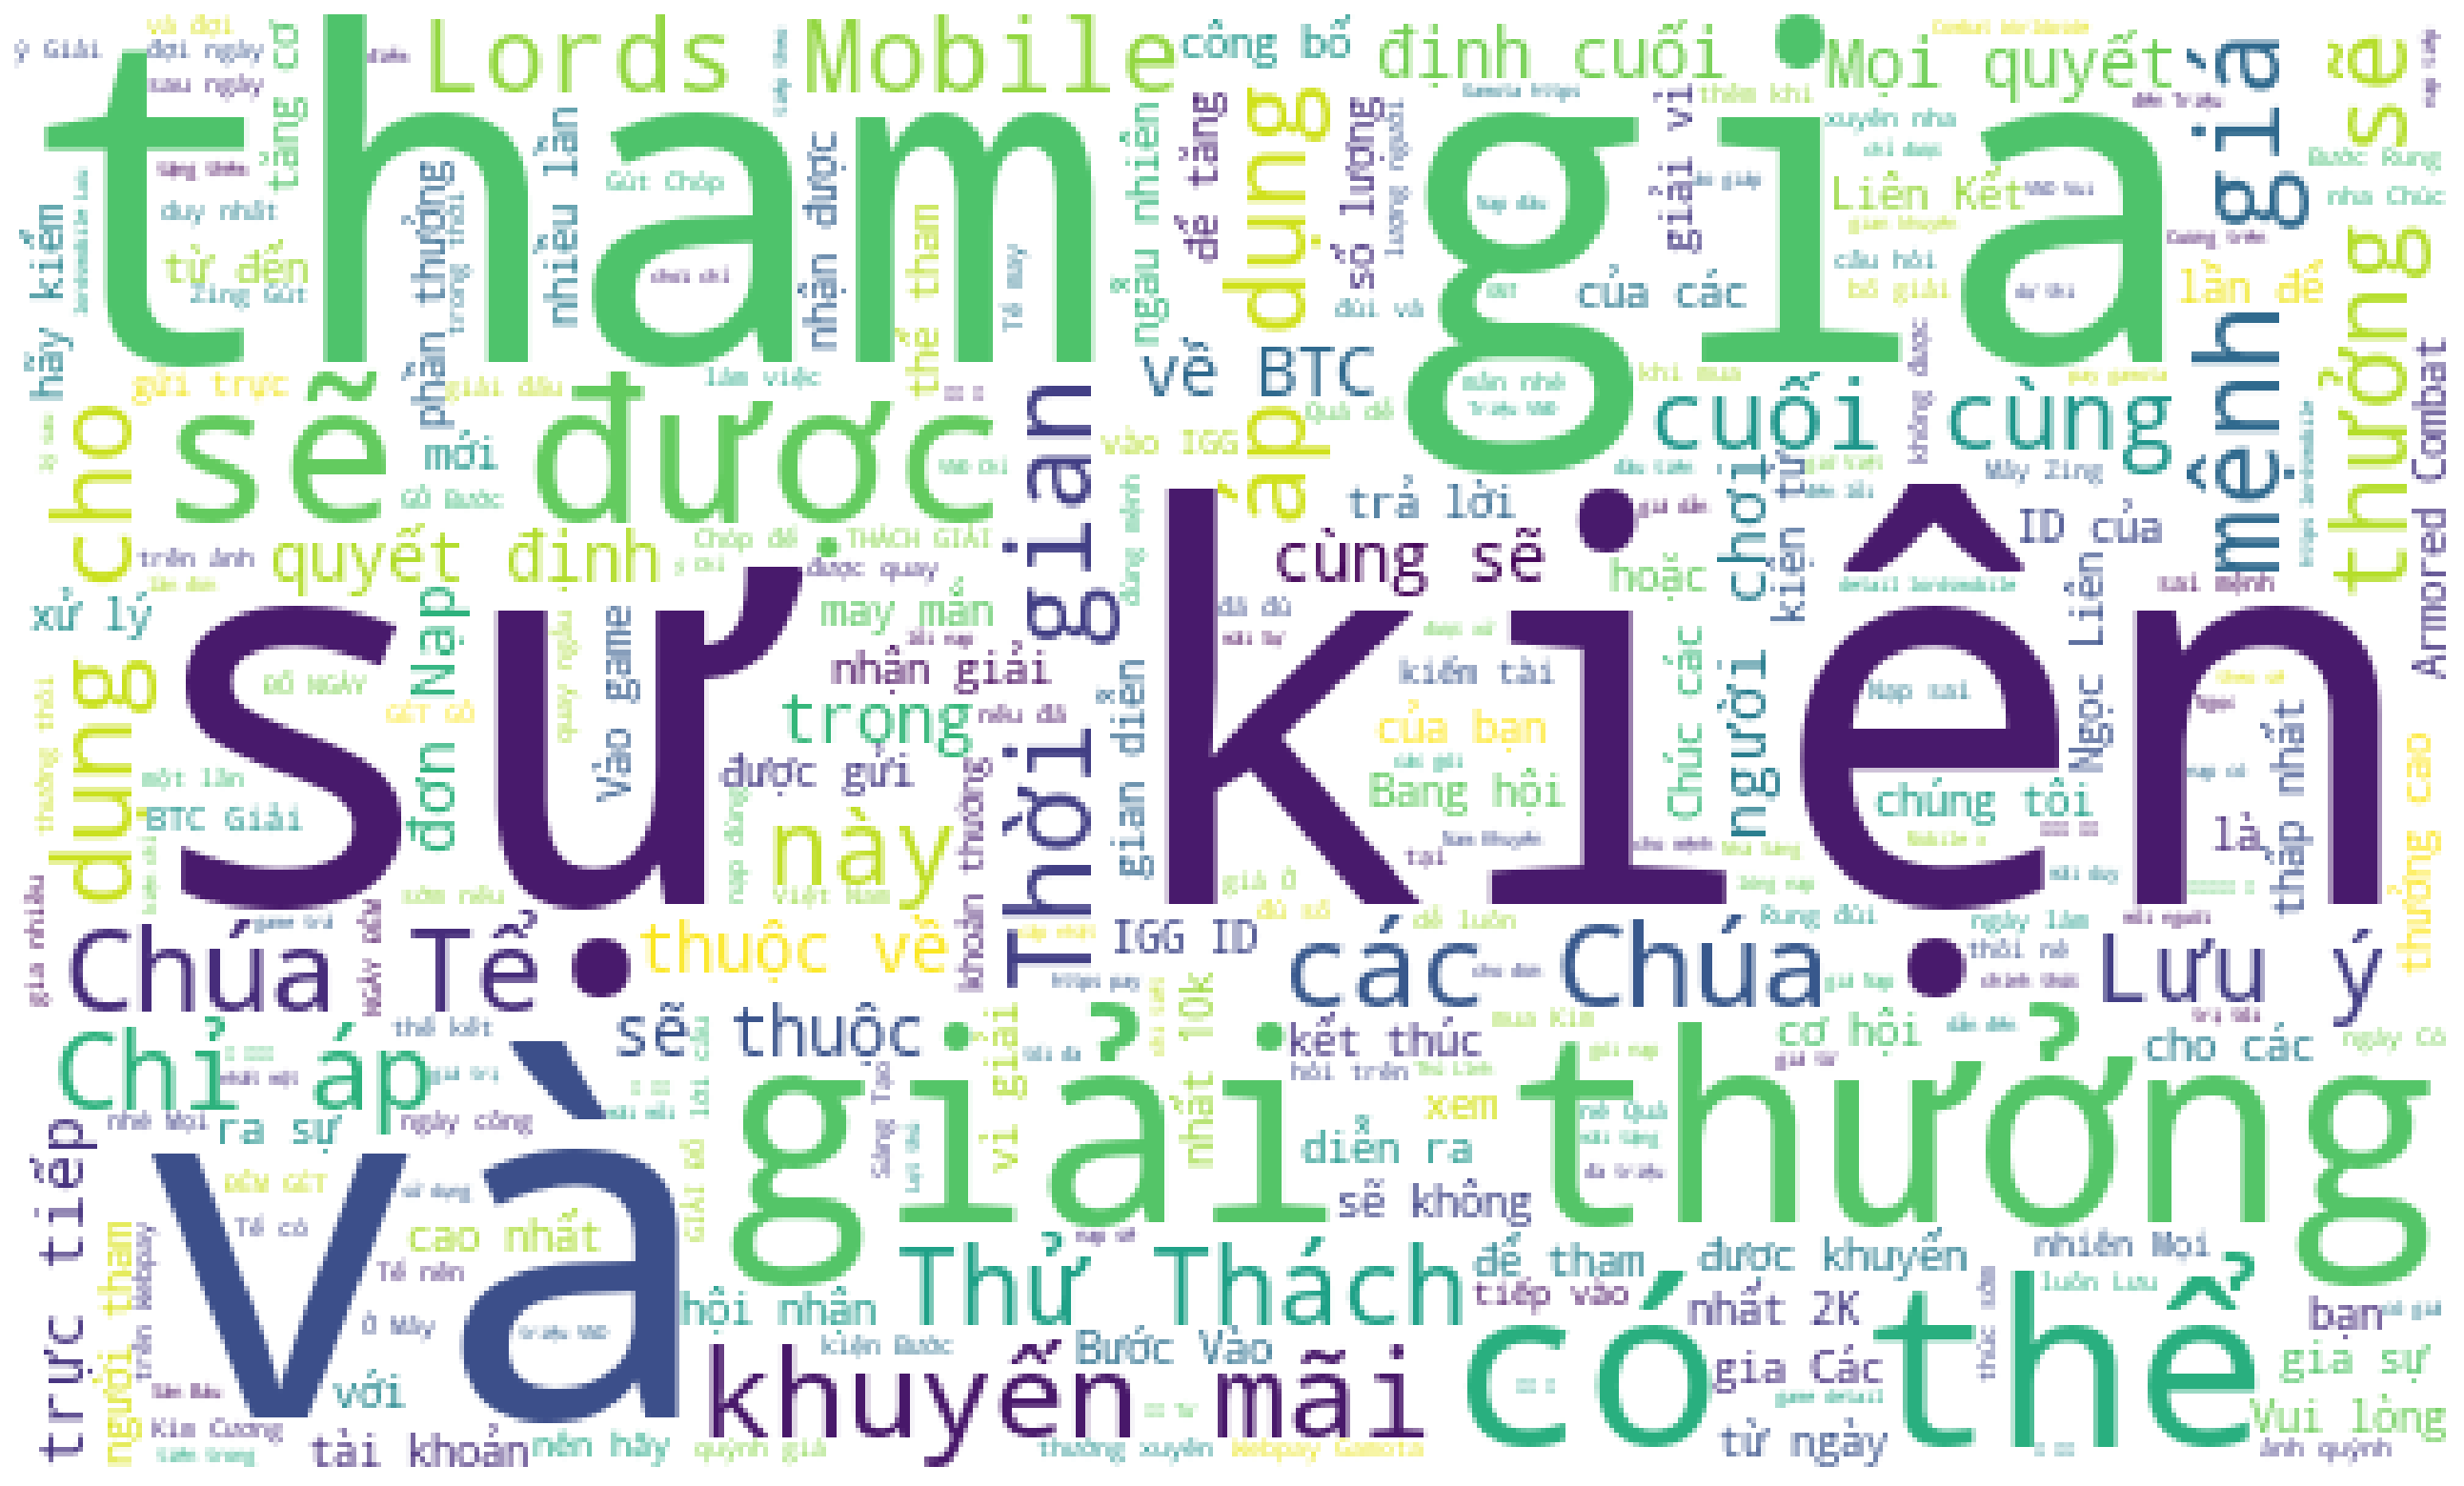

In [122]:
# Import WordCloud library
from wordcloud import WordCloud
from pathlib import Path
import os
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
texto = text
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=500, height=300
                         ).generate(texto)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

5. Phân tích và tổng hợp bài viết có ảnh, video và không có ảnh, video

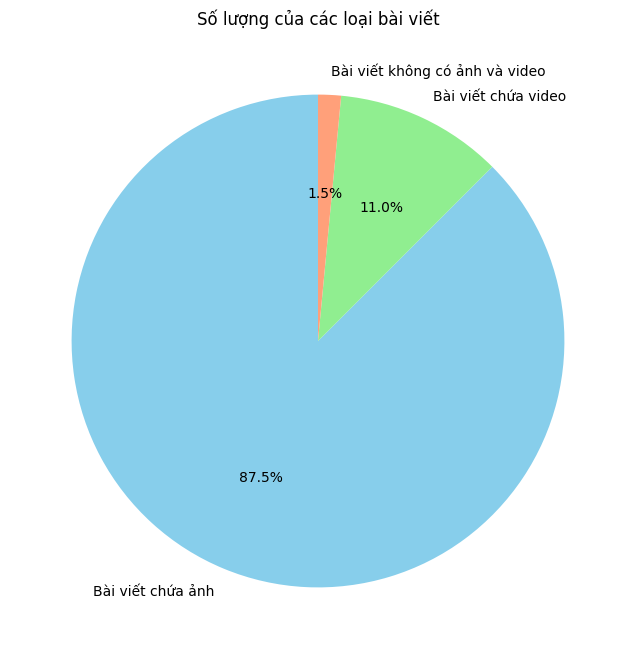

In [123]:
#image include
image_post = df.loc[df['Has_image'] == True]
video_post = df.loc[df['Has_video'] == True]
both_image_video_post = df.loc[(df['Has_video'] == True) & (df['Has_image'] == True) ]
not_image_video_post = df.loc[(df['Has_video'] ==False) & (df['Has_image'] == False) ]
number_image_post = len(image_post)
number_video_post = len(video_post)
number_not_image_video_post = len(not_image_video_post)
number_counts = [number_image_post, number_video_post, number_not_image_video_post]
labels = ['Bài viết chứa ảnh', 'Bài viết chứa video', 'Bài viết không có ảnh và video']
plt.figure(figsize=(8, 8))
plt.pie(number_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightsalmon'])
plt.title('Số lượng của các loại bài viết')
plt.show()

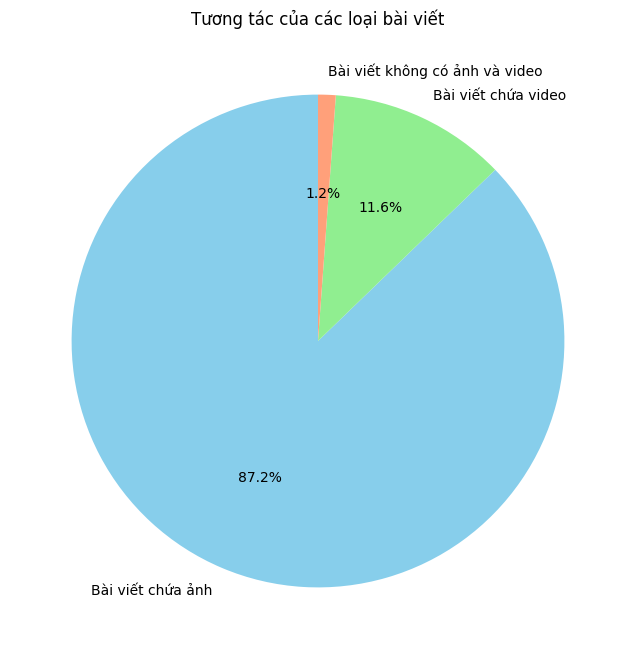

In [124]:
interaction_image_post = image_post['reaction_count'].sum()
interaction_video_post = video_post['reaction_count'].sum()
interaction_not_image_video_post = not_image_video_post['reaction_count'].sum()
interaction_counts = [interaction_image_post, interaction_video_post, interaction_not_image_video_post]
labels = ['Bài viết chứa ảnh', 'Bài viết chứa video', 'Bài viết không có ảnh và video']
plt.figure(figsize=(8, 8))
plt.pie(interaction_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightsalmon'])
plt.title('Tương tác của các loại bài viết')
plt.show()

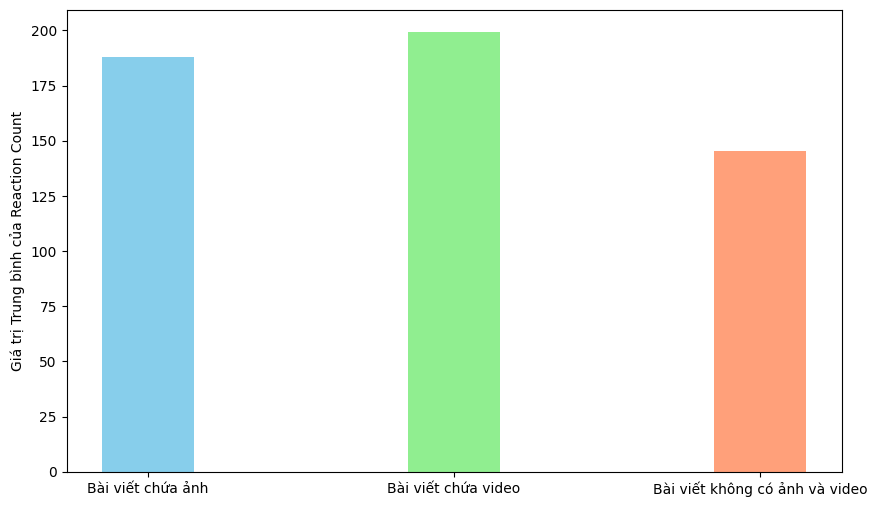

In [125]:
from sklearn.feature_extraction.text import CountVectorizer
mean_list = [image_post['reaction_count'].mean(),  video_post['reaction_count'].mean(),  not_image_video_post['reaction_count'].mean()]
labels = ['Bài viết chứa ảnh', 'Bài viết chứa video', 'Bài viết không có ảnh và video']
plt.figure(figsize=(10, 6))
plt.ylabel('Giá trị Trung bình của Reaction Count')
plt.bar(labels, mean_list, color=['skyblue', 'lightgreen','lightsalmon'], width=0.3 )
plt.show()